## Adversarial Attack on Cifar-10 dataset

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
import random
# data manipulation libraries
import numpy as np
import pandas as pd	

# visualisation libraries
import matplotlib.pyplot as plt
import seaborn as sns

2025-05-21 23:02:53.226197: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-21 23:02:53.308573: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-21 23:02:53.338050: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747861373.397190   40262 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747861373.410555   40262 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1747861373.501295   40262 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

In [3]:
# 1. Load and preprocess CIFAR-10 dataset and split it into train and test sets
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train, x_test = x_train.astype('float32') / 255.0, x_test.astype('float32') / 255.0
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

/tmp/ipykernel_40262/4016623427.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=train_labels, palette='Set2')
/tmp/ipykernel_40262/4016623427.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=test_labels, palette='Set2')


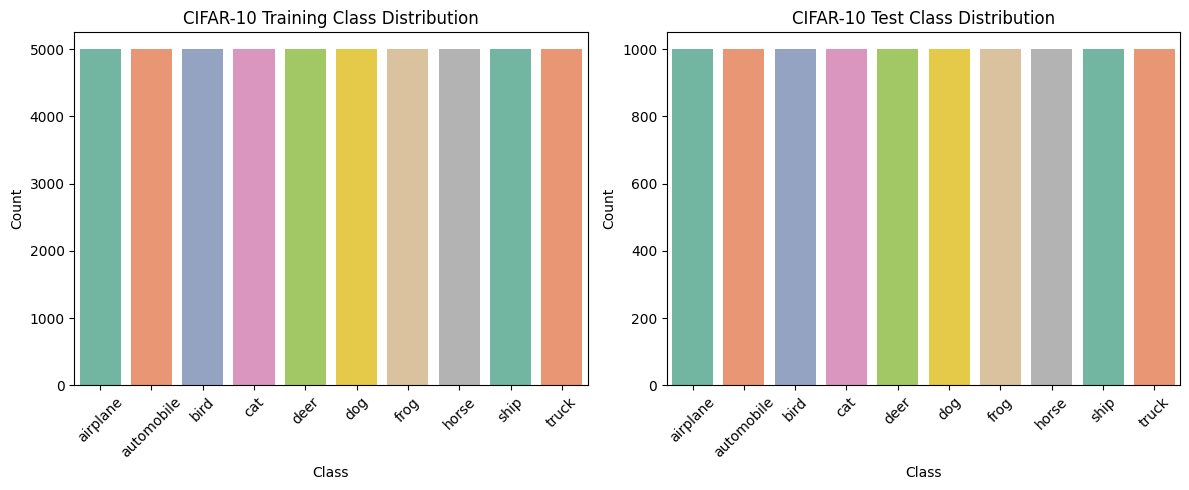

In [4]:
# CIFAR-10 class names in order:
class_names = [
    'airplane', 'automobile', 'bird', 'cat', 'deer',
    'dog', 'frog', 'horse', 'ship', 'truck'
]

# Visualize class distribution in training and test data
train_labels = np.argmax(y_train, axis=1)
test_labels = np.argmax(y_test, axis=1)

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.countplot(x=train_labels, palette='Set2')
plt.title('CIFAR-10 Training Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(ticks=range(10), labels=class_names, rotation=45)

plt.subplot(1,2,2)
sns.countplot(x=test_labels, palette='Set2')
plt.title('CIFAR-10 Test Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(ticks=range(10), labels=class_names, rotation=45)

plt.tight_layout()
plt.show()

### Compile a CNN

In [5]:
#CNN model
def build_cnn():
    model = models.Sequential([
        layers.Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(32,32,3)),
        layers.BatchNormalization(),
        layers.Conv2D(32, (3,3), activation='relu', padding='same'),
        layers.MaxPooling2D(),
        layers.Dropout(0.25),
        
        layers.Conv2D(64, (3,3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.Conv2D(64, (3,3), activation='relu', padding='same'),
        layers.MaxPooling2D(),
        layers.Dropout(0.25),
        
        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(10, activation='softmax')
    ])
    return model

model = build_cnn()
model.compile(optimizer=optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

/home/ryanpuglia/.conda/envs/BSP6_cifar/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
E0000 00:00:1747861377.895618   40262 cuda_executor.cc:1228] INTERNAL: CUDA Runtime error: Failed call to cudaGetRuntimeVersion: Error loading CUDA libraries. GPU will not be used.: Error loading CUDA libraries. GPU will not be used.
W0000 00:00:1747861377.899836   40262 gpu_device.cc:2341] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


 Train the model on Cifar-10

In [6]:
model.fit(x_train, y_train, batch_size=128, epochs=10, validation_split=0.1)

Epoch 1/10


2025-05-21 23:02:58.193683: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 552960000 exceeds 10% of free system memory.


352/352 ━━━━━━━━━━━━━━━━━━━━ 39s 107ms/step - accuracy: 0.2270 - loss: 2.7050 - val_accuracy: 0.1694 - val_loss: 2.5935
Epoch 2/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 37s 105ms/step - accuracy: 0.4281 - loss: 1.5395 - val_accuracy: 0.5292 - val_loss: 1.3597
Epoch 3/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 37s 106ms/step - accuracy: 0.5158 - loss: 1.3154 - val_accuracy: 0.6190 - val_loss: 1.0614
Epoch 4/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 37s 106ms/step - accuracy: 0.5757 - loss: 1.1704 - val_accuracy: 0.6516 - val_loss: 0.9696
Epoch 5/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 37s 106ms/step - accuracy: 0.6132 - loss: 1.0824 - val_accuracy: 0.6884 - val_loss: 0.8851
Epoch 6/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 37s 106ms/step - accuracy: 0.6506 - loss: 0.9950 - val_accuracy: 0.6944 - val_loss: 0.8730
Epoch 7/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 37s 105ms/step - accuracy: 0.6746 - loss: 0.9263 - val_accuracy: 0.7296 - val_loss: 0.7571
Epoch 8/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 38s 107ms/step - accuracy: 0.6971 - loss: 0.8649 - val

In [7]:
cnn_test_accuracy = model.evaluate(x_test, y_test)
print("Accuracy on test data is : ", cnn_test_accuracy[1] * 100)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7366 - loss: 0.7781
Accuracy on test data is :  73.78000020980835


## Implementation of untargeted FGSM attack

In [8]:
loss_object = tf.keras.losses.CategoricalCrossentropy()

#Define FGSM attack with optional patch mask
def fgsm_attack(model, image, label, eps=0.01, mask=None):
    image_var = tf.cast(image, tf.float32)
    with tf.GradientTape() as tape:
        tape.watch(image_var)
        prediction = model(image_var)
        loss = tf.keras.losses.CategoricalCrossentropy()(label, prediction)
    grad = tape.gradient(loss, image_var)
    signed_grad = tf.sign(grad)
    if mask is not None:
        signed_grad = signed_grad * mask
    adv = image_var + eps * signed_grad
    adv = tf.clip_by_value(adv, 0.0, 1.0)
    return adv

### Applying the attack to 5 random images from the dataset and visualising them:

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Clean accuracy on 5 samples:       100.0%
Adversarial accuracy (eps=0.1):  0.0%



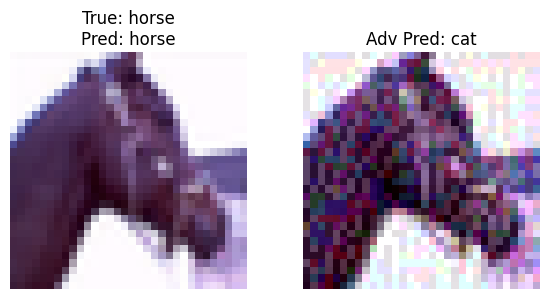

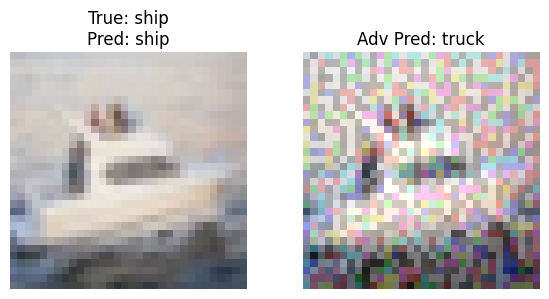

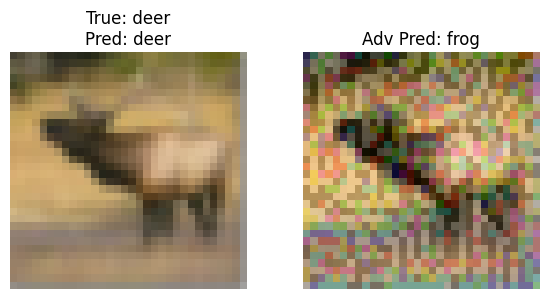

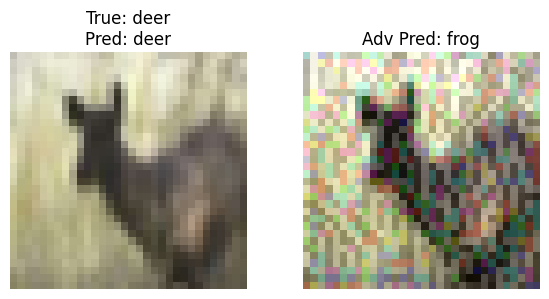

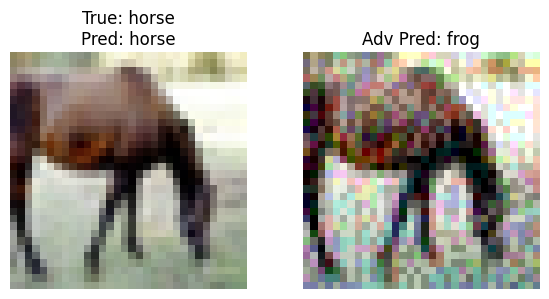

In [9]:
#Sample 5 random test images + labels
num_samples = 5
indices = random.sample(range(x_test.shape[0]), num_samples)
orig_imgs = x_test[indices]
orig_lbls = y_test[indices]  

eps = 0.1
adv_imgs = np.zeros_like(orig_imgs)
for i in range(num_samples):
    img = orig_imgs[i:i+1]
    lbl = orig_lbls[i:i+1]
    adv = fgsm_attack(model, img, lbl, eps=eps)
    adv_imgs[i] = adv[0]

clean_preds = np.argmax(model.predict(orig_imgs), axis=1)
adv_preds   = np.argmax(model.predict(adv_imgs),  axis=1)
true_labels = np.argmax(orig_lbls, axis=1)

# Print accuracies on these 5 samples
clean_acc = np.mean(clean_preds == true_labels)
adv_acc   = np.mean(adv_preds   == true_labels)
print(f"Clean accuracy on 5 samples:       {clean_acc*100:.1f}%")
print(f"Adversarial accuracy (eps={eps}):  {adv_acc*100:.1f}%\n")



for i in range(num_samples):
    fig, axes = plt.subplots(1, 2, figsize=(6, 3))
    
    # Original image
    axes[0].imshow(orig_imgs[i])
    axes[0].axis('off')
    axes[0].set_title(
        f"True: {class_names[true_labels[i]]}\n"
        f"Pred: {class_names[clean_preds[i]]}"
    )
    
    # Adversarial image
    axes[1].imshow(adv_imgs[i])
    axes[1].axis('off')
    axes[1].set_title(
        f"Adv Pred: {class_names[adv_preds[i]]}"
    )
    
    plt.tight_layout()
    plt.show()

### Function which applies a mask on a patch (patch size and position can be specified)

In [10]:

def create_patch_mask(image_shape, patch_size, patch_position=None):
    h, w, _ = image_shape
    mask = np.zeros((1, h, w, 1), dtype=np.float32)
    if patch_position is None:
        # center the patch
        y_start = (h - patch_size) // 2
        x_start = (w - patch_size) // 2
    else:
        y_start, x_start = patch_position
    mask[:, y_start:y_start+patch_size, x_start:x_start+patch_size, :] = 1.0
    return np.repeat(mask, image_shape[2], axis=-1)

### Examples of FGSM attack of various patch sizes

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


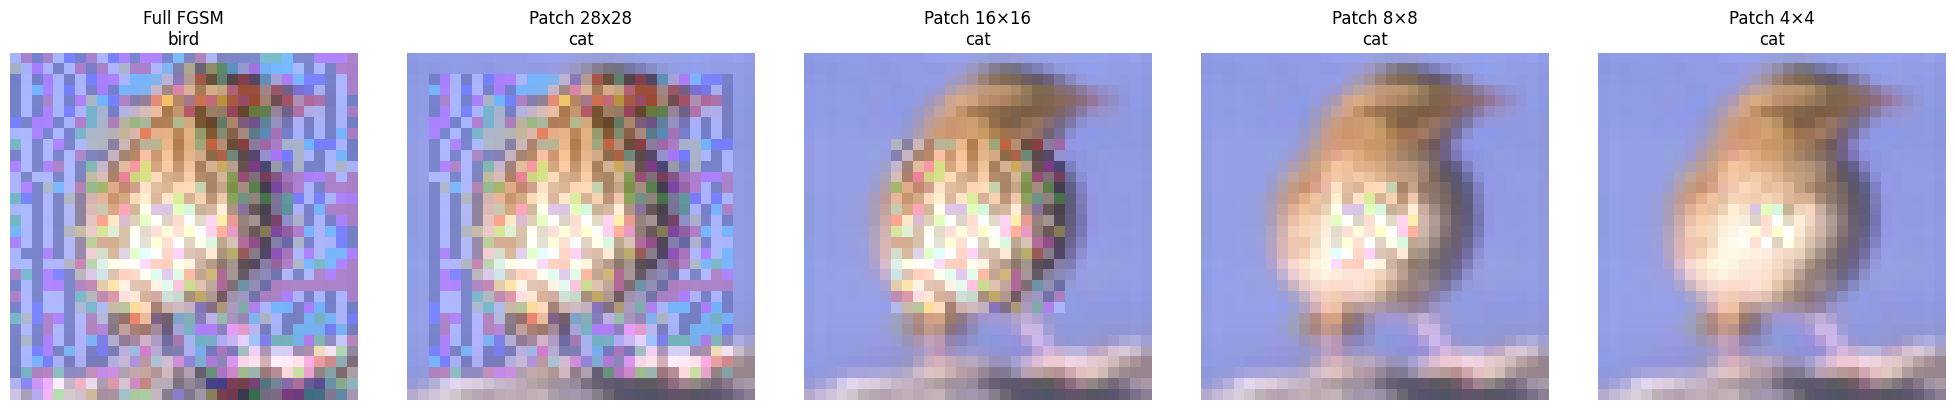

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


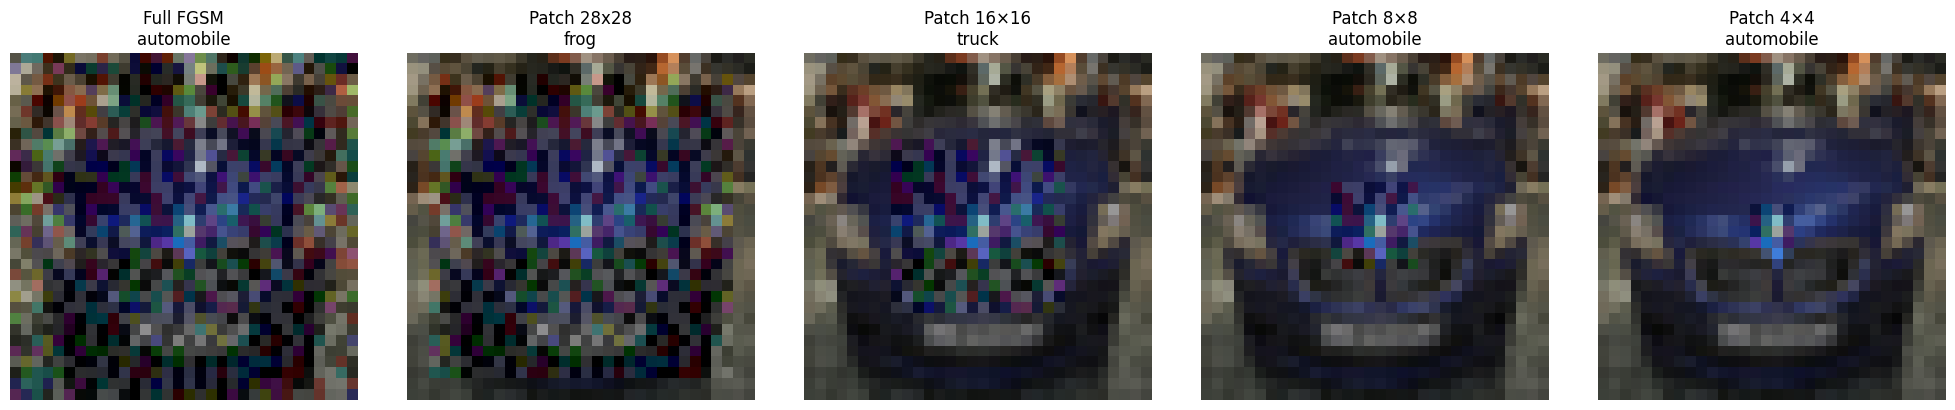

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


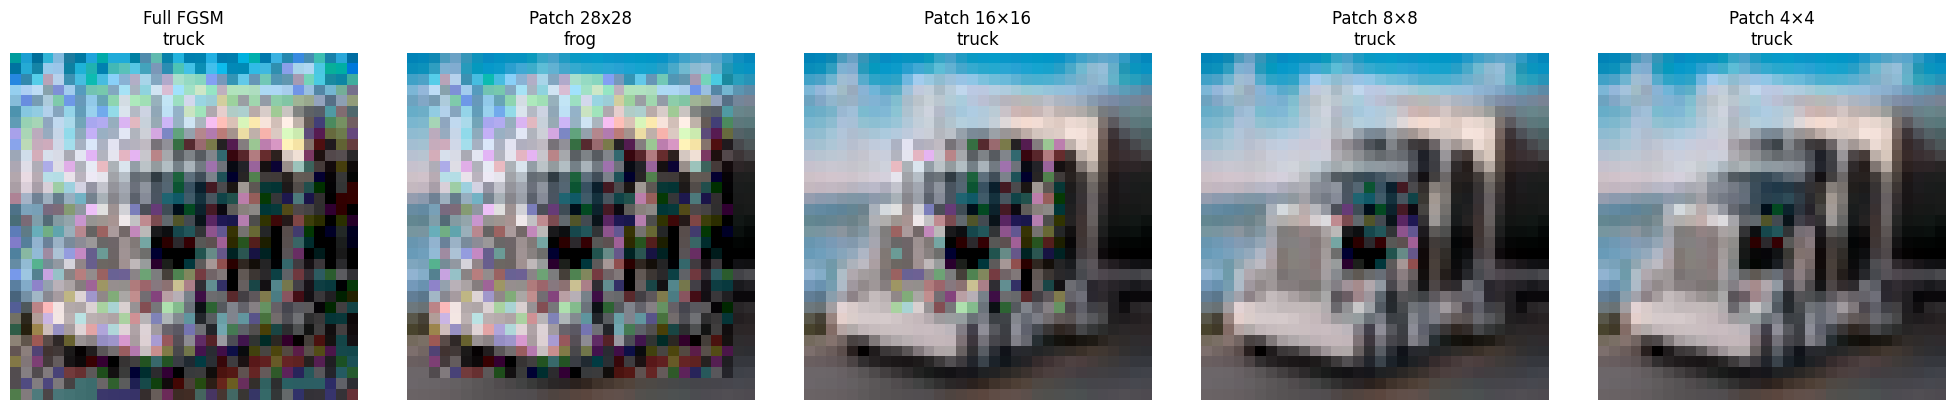

In [24]:
# a few samples
num_display = 3
idxs = random.sample(range(len(x_test)), num_display)

# the patch sizes
viz_sizes = [None, 28, 16, 8, 4]

for i, idx in enumerate(idxs):
    img = x_test[idx:idx+1]
    lbl = y_test[idx:idx+1]
    true_lbl = np.argmax(lbl)

    # generate all adversarial variants
    adv_variants = []
    for ps in viz_sizes:
        mask = create_patch_mask(img.shape[1:], ps) if ps is not None else None
        adv = fgsm_attack(model, img, lbl, eps=0.1, mask=mask)
        adv_variants.append(adv[0])

    # image predictions
    titles = []
    clean_pred = np.argmax(model.predict(img), axis=1)[0]
    titles.append(f"Full FGSM\n{class_names[true_lbl]}")

    for ps, adv_img in zip(viz_sizes[1:], adv_variants[1:]):
        p = np.argmax(model.predict(adv_img[None,...]), axis=1)[0]
        size_label = f"{ps}×{ps}"
        titles.append(f"Patch {size_label}\n{class_names[p]}")

    # full‐image attack title
    full_pred = np.argmax(model.predict(adv_variants[0][None,...]), axis=1)[0]
    titles[1] = f"Patch 28x28\n{class_names[full_pred]}"

   # plotting the images in a row
    fig, axes = plt.subplots(1, len(viz_sizes), figsize=(4*len(viz_sizes), 4))
    for ax, im, title in zip(axes, adv_variants, titles):
        ax.imshow(im)
        ax.set_title(title)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

### Applying the FGSM attack on patches of different sizes and evaluating their results:

In [11]:
def evaluate_attack(model, x_data, y_data, eps=0.01, patch_size=None, num_samples=500):
    correct = 0
    total = 0
    for i in random.sample(range(len(x_data)), num_samples):
        img = x_data[i:i+1]
        lbl = y_data[i:i+1]
        # create mask if patch_size specified
        mask = None
        if patch_size is not None:
            mask = create_patch_mask(img.shape[1:], patch_size)
        adv_img = fgsm_attack(model, img, lbl, eps, mask)
        pred = np.argmax(model.predict(adv_img), axis=1)
        true = np.argmax(lbl, axis=1)
        if pred != true:
            correct += 1
        total += 1
    return correct / total


# 7. Run evaluations
eps=0.1
full_attack_rate = evaluate_attack(model, x_test, y_test, eps=eps, patch_size=None)
patch_sizes = [28, 24, 20, 16, 12, 8, 4]
results_untargeted = {'full': full_attack_rate}
for size in patch_sizes:
    rate = evaluate_attack(model, x_test, y_test, eps=eps, patch_size=size)
    results_untargeted[f'patch_{size}'] = rate

print("Attack success rates:", results_untargeted)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━

### Displaying the results of the various patch sizes

/tmp/ipykernel_40262/4086775322.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=rates, palette='Set2')


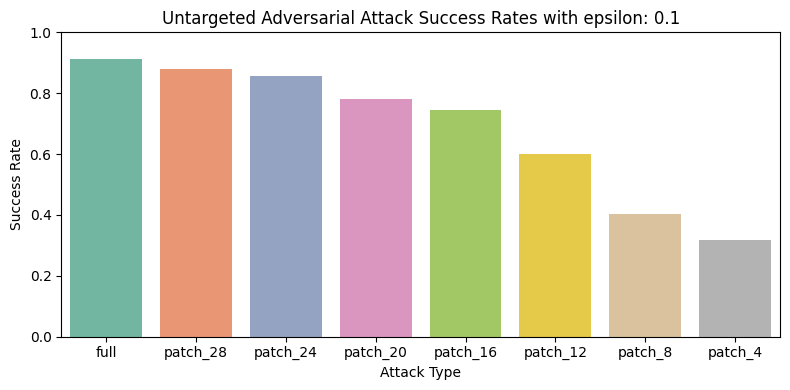

In [12]:
labels = list(results_untargeted.keys())
rates = list(results_untargeted.values())

plt.figure(figsize=(8,4))
sns.barplot(x=labels, y=rates, palette='Set2')
plt.title(f'Untargeted Adversarial Attack Success Rates with epsilon: {eps}')
plt.xlabel('Attack Type')
plt.ylabel('Success Rate')
plt.ylim(0,1)
plt.tight_layout()
plt.show()

## Implementation of a targeted FGSM attack

In [26]:

def fgsm_targeted(model, image, target_label, eps=0.01, mask=None):
    """
    Performs one-step targeted FGSM to push the model's prediction toward `target_label`.
    
    - model: your keras model
    - image: shape (1,H,W,C), float32 [0,1]
    - target_label: one-hot vector of shape (1,num_classes)
    - eps: perturbation magnitude
    - mask: optional same shape as image of 0/1 to confine perturbation
    """
    image_var = tf.cast(image, tf.float32)
    with tf.GradientTape() as tape:
        tape.watch(image_var)
        prediction = model(image_var)
        # use target_label here, not the true label
        loss = loss_object(target_label, prediction)
    grad = tape.gradient(loss, image_var)
    signed_grad = tf.sign(grad)
    if mask is not None:
        signed_grad = signed_grad * mask
    adv = image_var - eps * signed_grad
    adv = tf.clip_by_value(adv, 0.0, 1.0)
    return adv


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
0/5 were flipped to class 'ship'


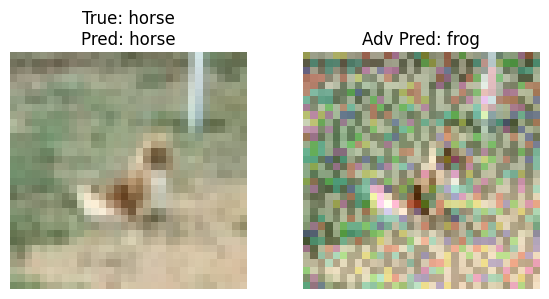

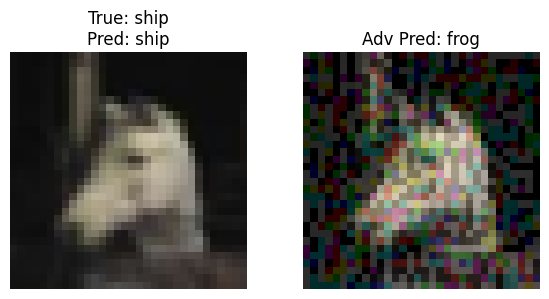

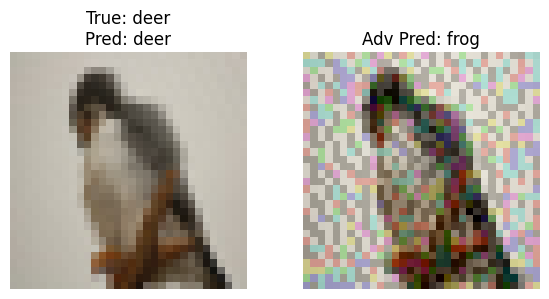

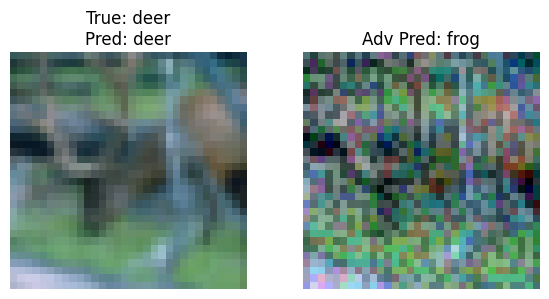

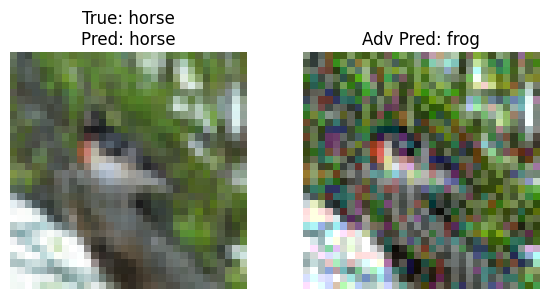

In [30]:
#Sample 5 random indices
num_samples = 5
idx = random.sample(range(x_test.shape[0]), num_samples)

orig_imgs = x_test[idx]
orig_lbls = y_test[idx]  

target_class = 8
target_onehot = tf.one_hot([target_class] * num_samples, depth=10)

eps = 0.1
adv_imgs = np.zeros_like(orig_imgs)
for i in range(num_samples):
    img = orig_imgs[i:i+1]
    tgt = target_onehot[i:i+1]
    adv = fgsm_targeted(model, img, tgt, eps=eps)
    adv_imgs[i] = adv[0]

adv_preds = np.argmax(model.predict(adv_imgs), axis=1)
success = np.sum(adv_preds == target_class)
print(f"{success}/{num_samples} were flipped to class '{class_names[target_class]}'")

for i in range(num_samples):
    fig, axes = plt.subplots(1, 2, figsize=(6, 3))
    
    # Original image
    axes[0].imshow(orig_imgs[i])
    axes[0].axis('off')
    axes[0].set_title(
        f"True: {class_names[true_labels[i]]}\n"
        f"Pred: {class_names[clean_preds[i]]}"
    )
    
    # Adversarial image
    axes[1].imshow(adv_imgs[i])
    axes[1].axis('off')
    axes[1].set_title(
        f"Adv Pred: {class_names[adv_preds[i]]}"
    )
    
    plt.tight_layout()
    plt.show()



## Targeted FGSM attacks on various patch sizes

In [31]:

def evaluate_attack_targeted(model,
                             x_data,
                             y_data,
                             target_class,    # integer 0–9
                             eps=0.01,
                             patch_size=None,
                             num_samples=500):
    success = 0
    idxs = random.sample(range(len(x_data)), num_samples)
    total = 0

    for i in idxs:
        img = x_data[i:i+1]      # shape (1, H, W, C)
        true_lbl = np.argmax(y_data[i])  # scalar

        # skip images already of target class
        if true_lbl == target_class:
            continue

        target_onehot = tf.one_hot([target_class], depth=y_data.shape[1])

        # create optional mask
        mask = None
        if patch_size is not None:
            mask = create_patch_mask(img.shape[1:], patch_size)

        adv_img = fgsm_targeted(
            model,
            img,
            target_onehot,
            eps=eps,
            mask=mask
        )

        pred_lbl = np.argmax(model.predict(adv_img), axis=1)[0]

        if pred_lbl == target_class:
            success += 1
        total += 1

    # note: denominator is num_samples, so success rate is success/num_samples
    return success / total


# 7. Run evaluations
eps=0.1
tgt = 8
full_attack_rate = evaluate_attack_targeted(model, x_test, y_test, target_class=tgt, eps=eps, patch_size=None)
patch_sizes = [28, 24, 20, 16, 12, 8, 4]
results_targeted = {'full': full_attack_rate}
for size in patch_sizes:
    rate_targeted = evaluate_attack(model, x_test, y_test, eps=eps, patch_size=size)
    results_targeted[f'patch_{size}'] = rate_targeted

print("Attack success rates:", results_targeted)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━

/tmp/ipykernel_40262/1165977463.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=rates, palette='Set2')


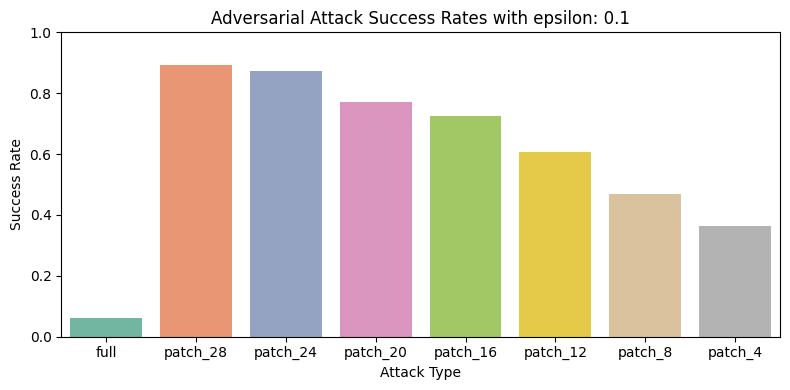

In [32]:
labels = list(results_targeted.keys())
rates = list(results_targeted.values())

plt.figure(figsize=(8,4))
sns.barplot(x=labels, y=rates, palette='Set2')
plt.title(f'Adversarial Attack Success Rates with epsilon: {eps}')
plt.xlabel('Attack Type')
plt.ylabel('Success Rate')
plt.ylim(0,1)
plt.tight_layout()
plt.show()

### Targeted PGD Attack

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


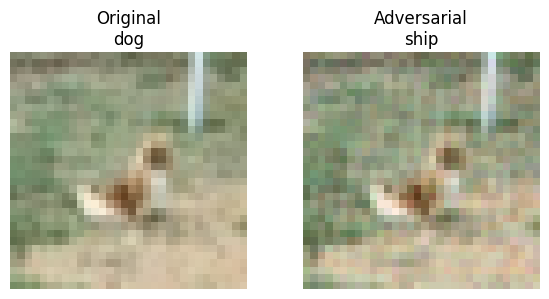

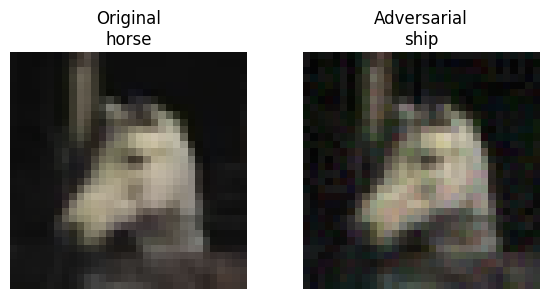

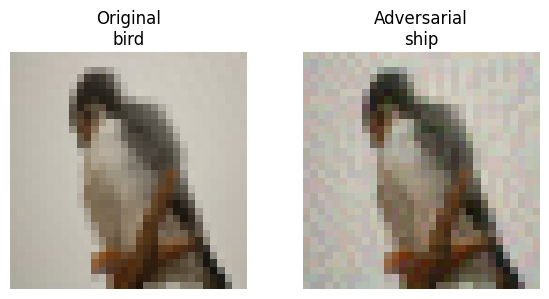

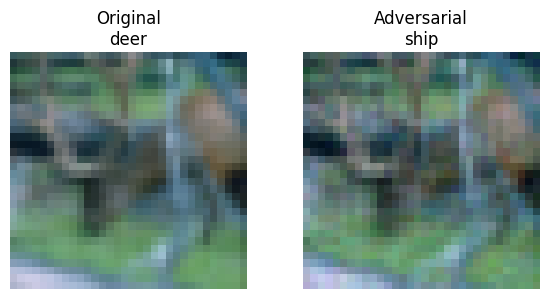

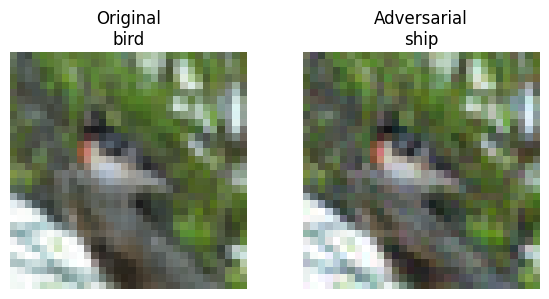

In [37]:
def pgd_targeted(model, image, target_label, eps=0.03, alpha=0.005, iters=10, mask=None):
    adv = tf.identity(image)
    target_label = tf.cast(target_label, tf.float32)
    for _ in range(iters):
        with tf.GradientTape() as tape:
            tape.watch(adv)
            pred = model(adv)
            loss = loss_object(target_label, pred)
        grad = tape.gradient(loss, adv)
        step = tf.sign(grad)
        if mask is not None:
            step = step * mask
        # move *toward* the target (minus sign)
        adv = adv - alpha * step
        # project back into the ε‐ball around the original
        adv = tf.clip_by_value(adv, image - eps, image + eps)
        adv = tf.clip_by_value(adv, 0.0, 1.0)
    return adv

# example usage for 5 images
eps, alpha, iters = 0.03, 0.005, 20
adv_imgs = []
for i in idx:
    img = x_test[i:i+1]; tgt = tf.one_hot([8], depth=10)
    adv = pgd_targeted(model, img, tgt, eps, alpha, iters)
    adv_imgs.append(adv[0])
adv_imgs = np.stack(adv_imgs)


# Re-grab the original images and true labels for those indices
orig_imgs   = x_test[idx]                          # shape (5, H, W, C)
true_labels = np.argmax(y_test[idx], axis=1)       # shape (5,)

# Compute the model’s predictions on the adversarial images
adv_preds = np.argmax(model.predict(adv_imgs), axis=1)

# Display each pair
for i in range(len(idx)):
    fig, axes = plt.subplots(1, 2, figsize=(6, 3))

    # Original
    axes[0].imshow(orig_imgs[i])
    axes[0].axis('off')
    axes[0].set_title(f"Original\n{class_names[true_labels[i]]}")

    # Adversarial
    axes[1].imshow(adv_imgs[i])
    axes[1].axis('off')
    axes[1].set_title(f"Adversarial\n{class_names[adv_preds[i]]}")

    plt.tight_layout()
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━

/tmp/ipykernel_40262/3740792493.py:84: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=rates, palette='Set2')


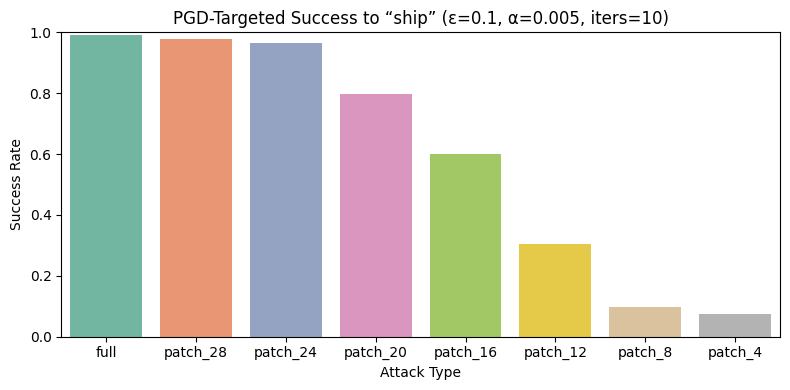

In [ ]:
# 1. Replace your FGSM‐based evaluator with a PGD‐based one:
def evaluate_pgd_targeted(model,
                          x_data,
                          y_data,
                          target_class,    # integer 0–9
                          eps=0.03,
                          alpha=0.005,
                          iters=10,
                          patch_size=None,
                          num_samples=500):
    success = 0
    total   = 0
    idxs    = random.sample(range(len(x_data)), num_samples)

    for i in idxs:
        img = x_data[i:i+1]                
        true_lbl = np.argmax(y_data[i])   

        # skip if already target
        if true_lbl == target_class:
            continue
        total += 1

        # build one‐hot target vector
        target_onehot = tf.one_hot([target_class], depth=y_data.shape[1])

        #spatial mask
        mask = (create_patch_mask(img.shape[1:], patch_size)
                if patch_size else None)

        # generate PGD adversarial example
        adv_img = pgd_targeted(
            model,
            img,
            target_onehot,
            eps=eps,
            alpha=alpha,
            iters=iters,
            mask=mask
        )

        pred_lbl = np.argmax(model.predict(adv_img), axis=1)[0]
        if pred_lbl == target_class:
            success += 1

    return success / total if total > 0 else 0.0


eps, alpha, iters = 0.1, 0.005, 10
tgt = 8  # e.g. “ship”

# full‐image PGD success
full_rate = evaluate_pgd_targeted(
    model, x_test, y_test,
    target_class=tgt,
    eps=eps,
    alpha=alpha,
    iters=iters,
    patch_size=None,
    num_samples=300
)

patch_sizes = [28, 24, 20, 16, 12, 8, 4]
results_pgd = {'full': full_rate}

for size in patch_sizes:
    rate = evaluate_pgd_targeted(
        model, x_test, y_test,
        target_class=tgt,
        eps=eps,
        alpha=alpha,
        iters=iters,
        patch_size=size,
        num_samples=300
    )
    results_pgd[f'patch_{size}'] = rate

# 3. Bar‐plot the results:
labels = list(results_pgd.keys())
rates  = list(results_pgd.values())

plt.figure(figsize=(8,4))
sns.barplot(x=labels, y=rates, palette='Set2')
plt.title(f'PGD‐Targeted Success to “{class_names[tgt]}” (ε={eps}, α={alpha}, iters={iters})')
plt.xlabel('Attack Type')
plt.ylabel('Success Rate')
plt.ylim(0,1)
plt.tight_layout()
plt.show()